<a href="https://colab.research.google.com/github/musinaa/CLTV/blob/main/customer_lifetime_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       6953 non-null   object 
 13  StreamingTV       6953 non-null   object 
 14  StreamingMovies   6953 non-null   object 
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  6953 non-null   object 


In [4]:
#type change
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].median())

(array([1153.,  525.,  407.,  321.,  303.,  284.,  262.,  285.,  223.,
         185.,  182.,  136.,  119.,  124.,  110.,  105.,   96.,  112.,
          96.,   99.,   95.,   78.,   97.,   99.,   85.,   80.,   86.,
          88.,  102.,   56.,   70.,   76.,   92.,   72.,   85.,   63.,
          73.,   62.,   55.,   57.,   56.,   45.,   44.,   43.,   35.,
          42.,   29.,   26.,   17.,    8.]),
 array([  18.8 ,  192.12,  365.44,  538.76,  712.08,  885.4 , 1058.72,
        1232.04, 1405.36, 1578.68, 1752.  , 1925.32, 2098.64, 2271.96,
        2445.28, 2618.6 , 2791.92, 2965.24, 3138.56, 3311.88, 3485.2 ,
        3658.52, 3831.84, 4005.16, 4178.48, 4351.8 , 4525.12, 4698.44,
        4871.76, 5045.08, 5218.4 , 5391.72, 5565.04, 5738.36, 5911.68,
        6085.  , 6258.32, 6431.64, 6604.96, 6778.28, 6951.6 , 7124.92,
        7298.24, 7471.56, 7644.88, 7818.2 , 7991.52, 8164.84, 8338.16,
        8511.48, 8684.8 ]),
 <a list of 50 Patch objects>)

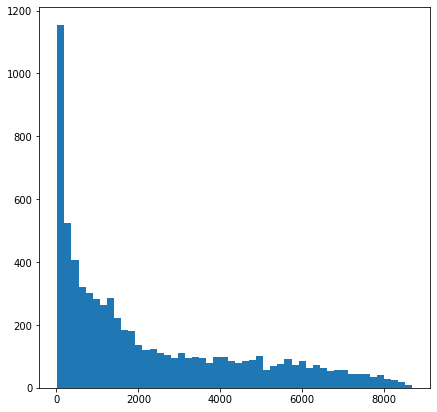

In [6]:
plt.figure(figsize=(7,7))
plt.hist(df['TotalCharges'],bins=50)

In [7]:
#Giving new values to the "Contract" variable

df["Contract"].replace("Month-to-month",1,inplace=True)
df["Contract"].replace("One year",12,inplace=True)
df["Contract"].replace("Two year",24,inplace=True)
df["Contract"]=df["Contract"].fillna(df["Contract"].mode()[0])
df["Contract"] = df["Contract"].astype(int)

In [8]:
df["new_totalcharges"]=df["MonthlyCharges"]*df["Contract"]
df[["new_totalcharges","TotalCharges"]].head()

,new_totalcharges,TotalCharges
0,29.85,29.85
1,683.40,1889.50
2,53.85,108.15
3,507.60,1840.75
4,70.70,151.65


In [21]:
#Number of transactions
df["Transection"]=df["TotalCharges"]/df["MonthlyCharges"]
df['Transection']=round( df['Transection'],0)

In [22]:
#Customer Lifetime Value calculation

def cltv_c(dataframe, profit=0.10):

    cltv_c = dataframe.groupby('customerID').agg({'Contract': lambda x: x.sum(),
                                                   'Transection': lambda x: x.sum(),
                                                   'TotalCharges': lambda x: x.sum()})

    cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']

    # Avg_order_value
    cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']

    # Purchase_Frequency
    cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]

    # Repeat rate & Churn rate
    repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
    churn_rate = 1 - repeat_rate

    # Profit_margin
    cltv_c['profit_margin'] = cltv_c['total_price'] * profit

    # Customer Value
    cltv_c['customer_value'] = (cltv_c['avg_order_value'] * cltv_c["purchase_frequency"])

    # Customer Lifetime Value
    cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(cltv_c[["cltv"]])
    cltv_c["scaled_cltv"] = scaler.transform(cltv_c[["cltv"]])

    # Segment
    cltv_c["segment"] = pd.qcut(cltv_c["scaled_cltv"], 4, labels=["D", "C", "B", "A"])

    return cltv_c

final_df = cltv_c(df)

In [23]:
final_df.reset_index().head()

,customerID,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv,scaled_cltv,segment
0,0002-ORFBO,12,9.0,593.30,49.441667,0.001704,59.330,0.084240,9.002683,0.004662,C
1,0003-MKNFE,1,9.0,542.40,542.400000,0.000142,54.240,0.077013,7.524239,0.003896,C
2,0004-TLHLJ,1,4.0,280.85,280.850000,0.000142,28.085,0.039876,2.017307,0.001041,D
3,0011-IGKFF,1,13.0,1237.85,1237.850000,0.000142,123.785,0.175756,39.188558,0.020310,C
4,0013-EXCHZ,1,3.0,267.40,267.400000,0.000142,26.740,0.037967,1.828715,0.000943,D


In [24]:
#averages of scaled_cltv in segment breakdown
final_df.groupby("segment").agg({"scaled_cltv": "mean"})

,scaled_cltv
segment,
D,0.000472
C,0.011086
B,0.082753
A,0.454086


In [25]:
#Number of customers in group A segment
final_df[final_df["segment"]=="A"].shape

(1761, 10)

In [26]:
#Number of customers in group D segment
final_df[final_df["segment"]=="D"].shape

(1761, 10)

In [29]:
#number of customers with churn in the dataset
df[df["Churn"]=="Yes"].shape

(1869, 24)

Churn refers to the number of customers that the business lost in a period.

We divided our customers into segments by making a sorting according to the CLTV values ​​to be calculated for each customer and by dividing at certain points according to the CLTV values ​​and creating groups.

Customers in segment A have the highest returns.

Purpose: to find its value in the company by comparing the behavior of all customers in our company and considering the buying habits of a single customer.

